In [1]:
#import all the needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #for visualization of the clusters and data
import seaborn as sn #this is also used for visualization
from sklearn.cluster import KMeans #for kmeans clustering
from sklearn.preprocessing import StandardScaler #for standardizing the data

In [2]:
#First load the dataset and store in the variable
df=pd.read_csv("Wine.csv")
df.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
df.info()#to get the information of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#checking if any column is containing the same values in all rows so that we can delete that column as there will be no use
df.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [5]:
#visualization of the data

In [6]:
#spliting the columns categorical and continuous for visualization
x=df.iloc[:,[0,]]
x
y=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
y


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
#stndardizing the both data frames 
stscalery=StandardScaler().fit_transform(y)

In [8]:

stscalery_df=pd.DataFrame(stscalery,columns=y.columns)


In [9]:
stscalery_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [10]:
for i in df.columns:
    a=df[i].skew()
    print(f"The skewness of {i} is ={a}")

The skewness of Type is =0.10743112358094281
The skewness of Alcohol is =-0.051482331077134784
The skewness of Malic is =1.0396511925814442
The skewness of Ash is =-0.17669931645735712
The skewness of Alcalinity is =0.21304688642645586
The skewness of Magnesium is =1.098191054755161
The skewness of Phenols is =0.08663858640245253
The skewness of Flavanoids is =0.02534355338149103
The skewness of Nonflavanoids is =0.4501513355621236
The skewness of Proanthocyanins is =0.5171371722998975
The skewness of Color is =0.8685847909572548
The skewness of Hue is =0.021091272199709302
The skewness of Dilution is =-0.30728549895848106
The skewness of Proline is =0.7678217813897322


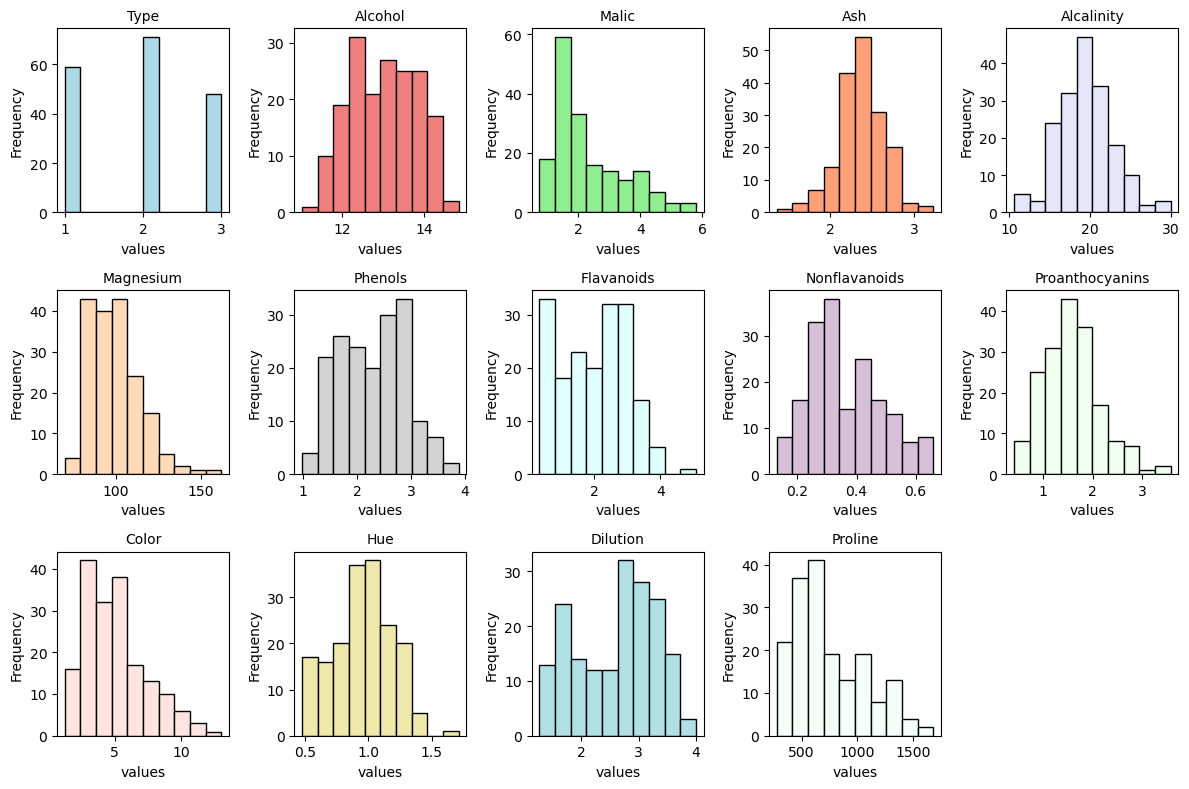

In [11]:
# Define light colors for better visualization
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lavender', 'peachpuff', 
          'lightgray', 'lightcyan', 'thistle', 'honeydew', 'mistyrose', 'palegoldenrod', 
          'powderblue', 'mintcream']
fig,axes=plt.subplots(3,5,figsize=(12,8))
axes=axes.flatten()#flatten to iterate easily
# Plot each feature with unique light colors
for i,col in enumerate(df.columns): #enumerate through every column
    if i<len(axes): # Ensure we don’t exceed the number of available axes
        axes[i].hist(df[col],color=colors[i],edgecolor='black')
        axes[i].set_title(col,fontsize=10)
        axes[i].set_xlabel("values")
        axes[i].set_ylabel("Frequency")
# Hide unused subplot (since 3x5 = 15, we have one extra)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
plt.tight_layout()
plt.show()

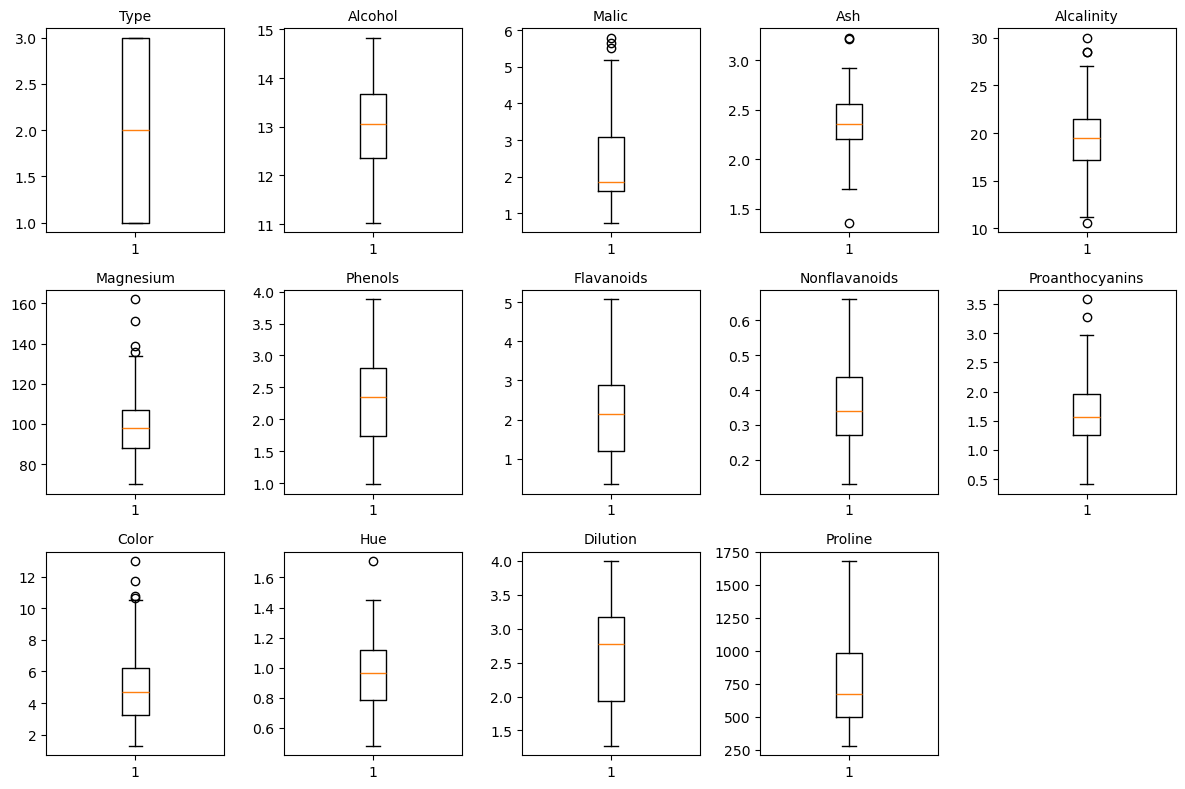

In [12]:
#creating a dashboard that contains all the boxplots which is used to detect outlayers

fig, axes = plt.subplots(3, 5, figsize=(12, 8))  # Adjust layout to fit 14 plots
axes = axes.flatten()  # Flatten to iterate easily

# creating a for loop to create a dashboard for detecting outlayers using boxplot

for i, col in enumerate(df.columns): 
    axes[i].boxplot(df[col]) 
    axes[i].set_title(col, fontsize=10)  # Set column name as title

    
# Hide unused subplot (since 3x5 = 15, we have one extra)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

In [13]:
#finding the values of the outlayers
for i in df.columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[i][(df[i]<lower_bound)|(df[i]>upper_bound)]
    print(f"outliers of {i}=",outliers)
    print()

outliers of Type= Series([], Name: Type, dtype: int64)

outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)

outliers of Malic= 123    5.80
137    5.51
173    5.65
Name: Malic, dtype: float64

outliers of Ash= 25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64

outliers of Alcalinity= 59     10.6
73     30.0
121    28.5
127    28.5
Name: Alcalinity, dtype: float64

outliers of Magnesium= 69    151
73    139
78    136
95    162
Name: Magnesium, dtype: int64

outliers of Phenols= Series([], Name: Phenols, dtype: float64)

outliers of Flavanoids= Series([], Name: Flavanoids, dtype: float64)

outliers of Nonflavanoids= Series([], Name: Nonflavanoids, dtype: float64)

outliers of Proanthocyanins= 95     3.28
110    3.58
Name: Proanthocyanins, dtype: float64

outliers of Color= 151    10.80
158    13.00
159    11.75
166    10.68
Name: Color, dtype: float64

outliers of Hue= 115    1.71
Name: Hue, dtype: float64

outliers of Dilution= Series([], Name: Dilution, dtype: fl

In [14]:
#here we can find the outlayers in some of the values and there are not more than 5% so we can remove them or cap them 
for i in df.columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[i][(df[i]<lower_bound)|(df[i]>upper_bound)]
    print(f"outliers of {i}=",outliers)
    print()
 # Capping outliers
    df[i] = df[i].clip(lower_bound, upper_bound)
    print(f"\nUpdated {i} column after capping:\n", df[i])
    print()
    print()
#outlayers removed successfully

outliers of Type= Series([], Name: Type, dtype: int64)


Updated Type column after capping:
 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64


outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)


Updated Alcohol column after capping:
 0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64


outliers of Malic= 123    5.80
137    5.51
173    5.65
Name: Malic, dtype: float64


Updated Malic column after capping:
 0      1.7100
1      1.7800
2      2.3600
3      1.9500
4      2.5900
        ...  
173    5.3025
174    3.9100
175    4.2800
176    2.5900
177    4.1000
Name: Malic, Length: 178, dtype: float64


outliers of Ash= 25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64


Updated Ash column after capping:
 0      2.43
1      2.14
2      2.67
3    

In [15]:
#conforming whether the outlayers where capped successfully or not

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[i][(df[i] < lower_bound)|(df[i] > upper_bound)]
    print(f"Outliers of {i}=", outliers)
    print()

Outliers of Type= Series([], Name: Type, dtype: int64)

Outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)

Outliers of Malic= Series([], Name: Malic, dtype: float64)

Outliers of Ash= Series([], Name: Ash, dtype: float64)

Outliers of Alcalinity= Series([], Name: Alcalinity, dtype: float64)

Outliers of Magnesium= Series([], Name: Magnesium, dtype: float64)

Outliers of Phenols= Series([], Name: Phenols, dtype: float64)

Outliers of Flavanoids= Series([], Name: Flavanoids, dtype: float64)

Outliers of Nonflavanoids= Series([], Name: Nonflavanoids, dtype: float64)

Outliers of Proanthocyanins= Series([], Name: Proanthocyanins, dtype: float64)

Outliers of Color= Series([], Name: Color, dtype: float64)

Outliers of Hue= Series([], Name: Hue, dtype: float64)

Outliers of Dilution= Series([], Name: Dilution, dtype: float64)

Outliers of Proline= Series([], Name: Proline, dtype: int64)



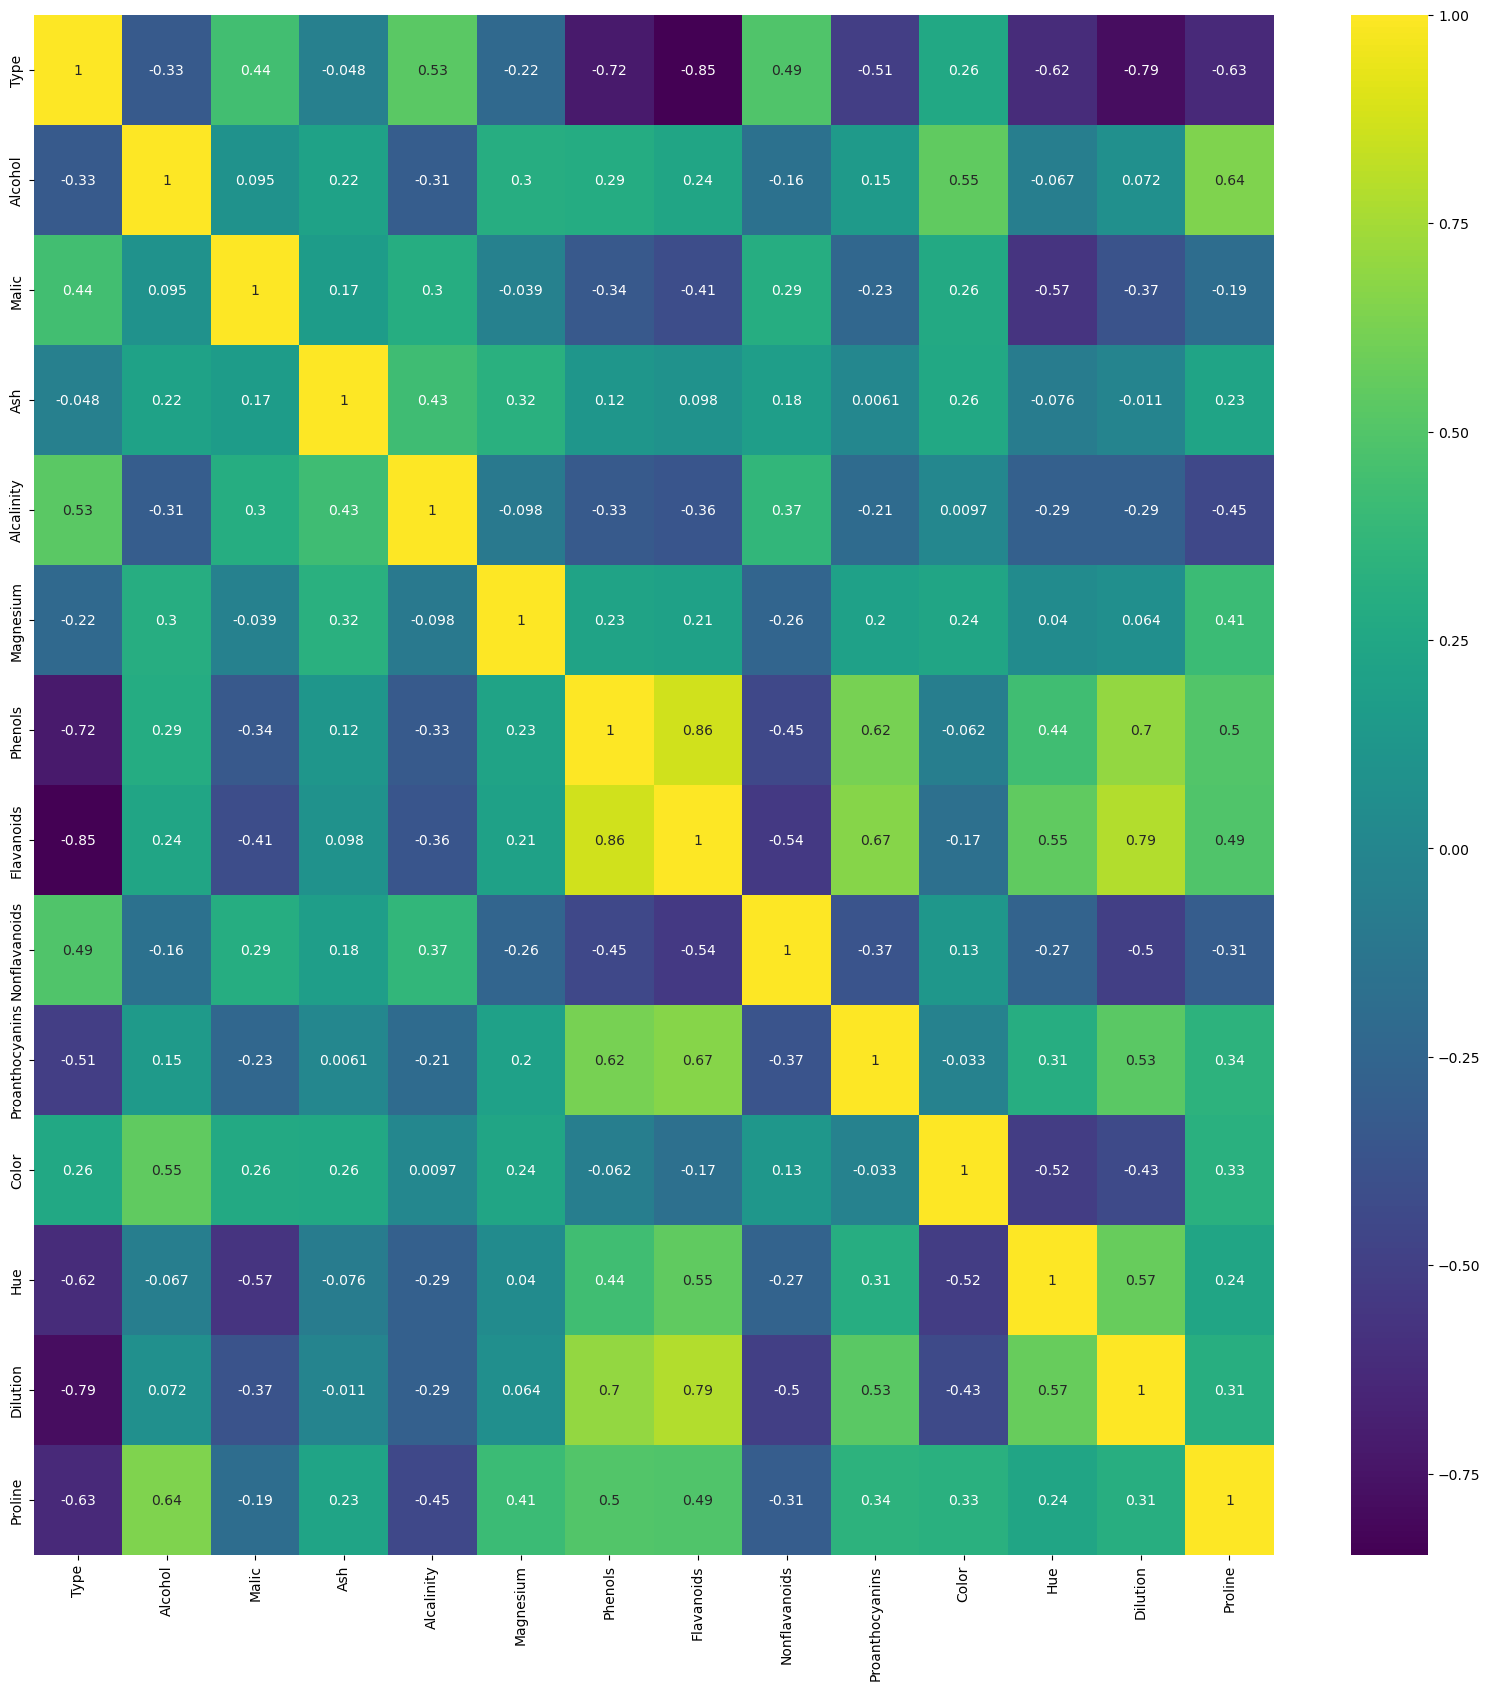

In [16]:
#checking the correlation and creating the heatmap for visualizing the relationships

corr=df.corr()

plt.figure(figsize=(20,20))
sn.heatmap(corr,cmap='viridis',annot=True)
plt.show()

##  Task 2: Dimensionality Reduction with PCA:

In [18]:
#joining both the columns 
df_new=pd.concat([stscalery_df,df['Type']],axis=1)
df_new

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [19]:
# 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

#The scree plot is used to visualize the "variance explained by each principle component" and is uusefull fro identifying the "elbow point", where addiional 
#components contribution is minimally


#using the cumulative explained variance ensures that the selected PCs capture atleast "90-95%" of total variance


#PCA identifies Principle components by calculating "eigen values"(amount of variance in given direction) and "eigen vectors"(direction of next principle components) 
#from the covariance matrix

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


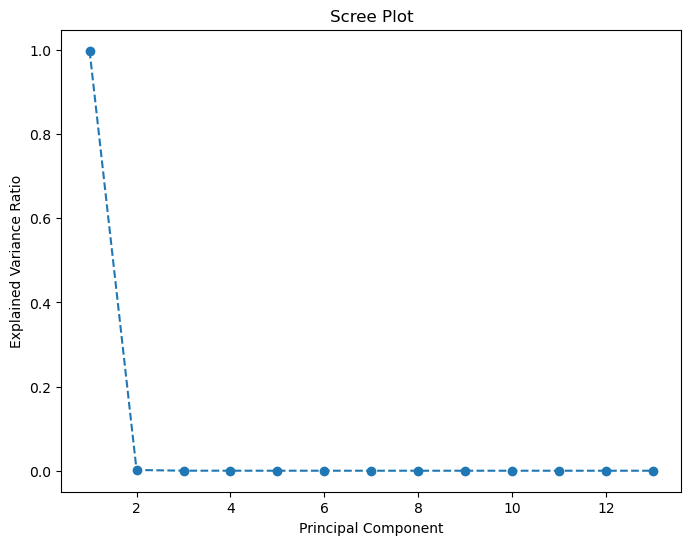

In [20]:
#performing the scree plot for selecting the deatures

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(y)

# Explained variance
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

# Scree plot
plt.figure(figsize=(8,6))

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

## Cumulative Explained Variance

In [22]:
# Cumulative explained variance
cumulative_variance=np.cumsum(explained_variance)
cumulative_variance

array([0.99809123, 0.99982715, 0.99992211, 0.99997232, 0.99998469,
       0.99999315, 0.99999596, 0.99999748, 0.99999861, 0.99999933,
       0.99999971, 0.99999992, 1.        ])

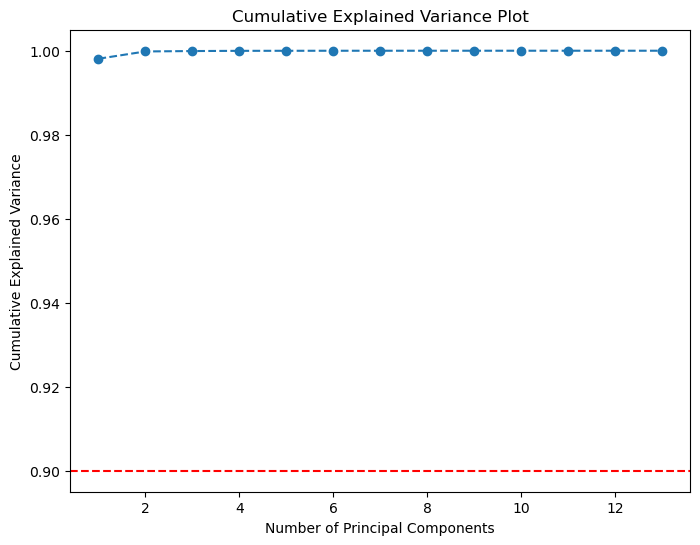

In [23]:
# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.axhline(y=0.90, color='r', linestyle='--')  # Threshold (e.g., 90%)
plt.show()

In [24]:
#from the above graphs with the help of elbow we can conclude that the the principle component 2 is the best principle component

pca=PCA(n_components=2)  #pca with two columns having maximun variance
pca=pca.fit_transform(y)
pca=pd.DataFrame(pca,columns=['pca1','pca2'])
pca

,pca1,pca2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [25]:
#concating the pca and type

x_pca=pd.concat([pca,df['Type']],axis=1)
x_pca

,pca1,pca2,Type
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,3
174,3.131605,2.335191,3
175,88.458074,18.776285,3
176,93.456242,18.670819,3


<Axes: xlabel='pca1', ylabel='pca2'>

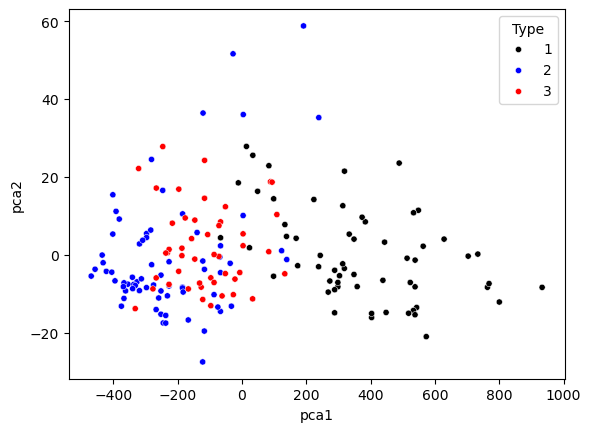

In [26]:
# Define bright colors
bright_colors = ["black", "blue", "red",]


sn.scatterplot(data=x_pca,x='pca1',y='pca2',hue='Type',s=20,palette=bright_colors)

## Task 3: Clustering with Original Data:
Apply a clustering algorithm (e.g., K-means) to the original dataset.
Visualize the clustering results using appropriate plots.
Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [28]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
clusters=KMeans(n_clusters=2,random_state=37)
x=df.iloc[:,1:]  

df['k=5']=clusters.fit_predict(x)

from sklearn.metrics  import silhouette_score
score=silhouette_score(x,df['k=5'])
print("silhouette score is",score)

silhouette score is 0.6571518561319196


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
df['Type'].value_counts(),df['k=5'].value_counts()

(Type
 2    71
 1    59
 3    48
 Name: count, dtype: int64,
 k=5
 0    123
 1     55
 Name: count, dtype: int64)

In [31]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,k=5
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


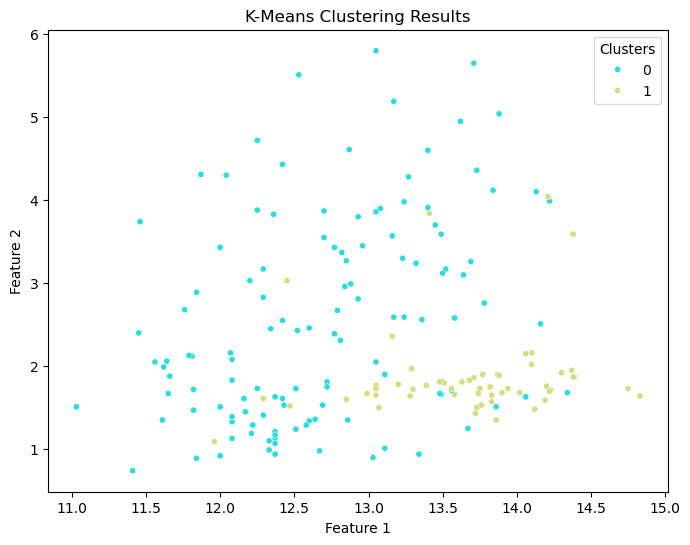

In [32]:
# Assuming `df` contains your data, `labels` contains assigned cluster labels
plt.figure(figsize=(8, 6))
sn.scatterplot(x=y.iloc[:, 0], y=y.iloc[:, 1], hue=df['k=5'], s=20,palette='rainbow')
plt.title('K-Means Clustering Results')                        #size of dots
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Clusters")
plt.show()

In [33]:
#applying the kmeans algorithm on same pca transformed dataset (pca dataset) which was the output of task 2
pca_KMeans=KMeans(n_clusters=2,random_state=37)
labels_pca=pca_KMeans.fit_predict(x_pca)
label_pca=pd.DataFrame(labels_pca,columns=['KMeans_with_pca'])
label_pca

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,KMeans_with_pca
0,1
1,1
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0


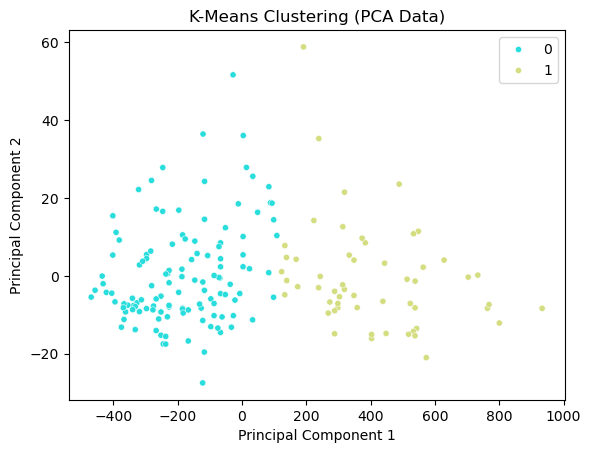

In [34]:
#Visualizing through scatter plot
sn.scatterplot(x=x_pca.iloc[:,0],y=x_pca.iloc[:,1],hue=labels_pca,s=20,palette='rainbow')
plt.title("K-Means Clustering (PCA Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [35]:

#Compare the clustering results from PCA-transformed data with those from the original dataset

print("results using PCA:\n",df['Type'].value_counts())
print()

print("results using kmeans:\n",df['k=5'].value_counts())
print()

print("results using kmeans_to_pca:\n",label_pca.value_counts())
print()

results using PCA:
 Type
2    71
1    59
3    48
Name: count, dtype: int64

results using kmeans:
 k=5
0    123
1     55
Name: count, dtype: int64

results using kmeans_to_pca:
 KMeans_with_pca
0                  123
1                   55
Name: count, dtype: int64



In [36]:
#comparing the silhouette score of kmeans on originl file and with kmeans with pca
print("the silhouette score of KMeans with k=5 is",score )
scr=silhouette_score(x_pca,labels_pca)
print("silhouette score of KMeans with pca is ",scr)

the silhouette score of KMeans with k=5 is 0.6571518561319196
silhouette score of KMeans with pca is  0.657212380545698


## Task 5: Comparison and Analysis:


## Task 6: Conclusion and Insights